#**Финальный проект**

**Скрипцов Михаил**

"А/В тестирование изменения расположения рекламы"

Наша компания является маркетплейсом товаров. У нас в приложении есть рекламные блоки, с помощью которых продавцы могут продвигать свои товары.
Необходимо провести АБ тест по размещению рекламы и сравнить места размещения.

#Анализ поведения пользователей до начала тестирования

Расчитаем конверсию

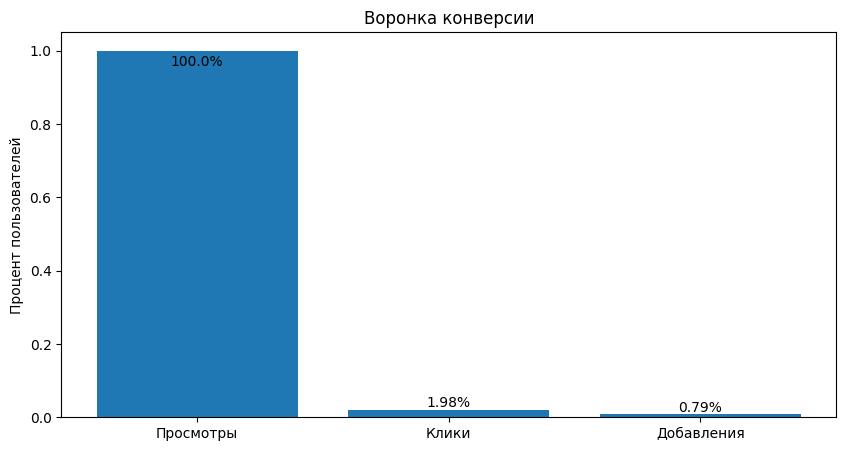

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Преобразование столбца 'dt' в тип данных datetime
df["dt"] = pd.to_datetime(df["dt"])

# Подсчет количества событий для каждого типа события
event_counts = df["event_type"].value_counts()

# Создание массива с количеством пользователей, прошедших через каждый этап воронки
funnel_counts = np.array([
    event_counts["views"],
    event_counts["clicks"],
    event_counts["adds"],
])

# Нормализация количества пользователей на каждом этапе по количеству просмотров
funnel_percentages = funnel_counts / funnel_counts[0]

# Построение воронки конверсии
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar([0, 1, 2], funnel_percentages)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["Просмотры", "Клики", "Добавления"])
ax.set_ylabel("Процент пользователей")
ax.set_title("Воронка конверсии")
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - (bar.get_height() * 0.05),
        f"{round(bar.get_height() * 100, 2)}%",
        ha="center",
        va="bottom",
    )
plt.show()


✅**Выводы о поведении пользователей при взаимодействии с секцией рекламы до начала тестирования:**

Низкая конверсия в добавление товаров в корзину из просмотра главной (0,79%) указывает на то, что пользователи неохотно переходят из просмотра главной страницы на рекламные блоки. Это может быть связано с тем, что реклама не привлекает внимание пользователей или не соответствует их интересам.
Более высокая конверсия в добавление товаров в корзину от захода в рекламу (42,65%) свидетельствует о том, что пользователи, которые нажимают на рекламные блоки, с большей вероятностью добавят товары в корзину. Это говорит о том, что реклама эффективна в привлечении заинтересованных пользователей, вероятно потому, что она более целенаправленна и соответствует интересам пользователей. Низкая кликабельность секции рекламы (1,98%) указывает на то, что пользователи неохотно нажимают на рекламные блоки. Это может быть связано с тем, что реклама не привлекает внимание пользователей или не соответствует их интересам.

# Дизайн теста

**H0:** Расположение секции рекламы над основной секцией не приведет к увеличению конверсии добавления товаров в корзину от просмотра главной.

**H1:** Расположение секции рекламы над основной секцией приведет к увеличению конверсии добавления товаров в корзину от просмотра главной.

Гипотеза является односторонней.

Ключевые метрики теста

- Конверсия в заказ от просмотра главной

- Конверсия в клик на рекламу от просмотра главной (кликабельность)

- Выручка на покупателя (ARPPU) по товарам, добавленным из секции

Вспомогательные метрики:

- Конверсия в заказ от захода в рекламу

- Конверсия в добавление товаров в корзину от захода в рекламу

- Конверсия в добавление товаров в корзину из рекламы от просмотра главной

- Выручка на пользователя (ARPU) по товарам, добавленным из секции


#MDE и размер выборки

MDE = CTR * CVR * PTR, где:

Кликабельность (CTR) = 1,98%

Конверсия в добавление товаров в корзину (CVR) = 0,79%

MDE = 0,01984439063923675 * 0,4265021168927858 * 1

MDE ≈ 0,008493784316437897

Приблизительное значение MDE для данной рекламной кампании составляет 0,00849.

Ожидаемый эффект, на основании опыта предыдущего теста, составляет 2,5%, таким образом ожидаемая конверсия в тестовой группе составит
p 2 = 0,79%*1,025 = 0,81%
Используя статистический калькулятор Power Calculator, рассчитаем размер выборки с учетом следующих параметров:

Относительное улучшение: 2,5%

Уровень значимости: 0,05

Статистическая мощность: 0,8

Расчетный размер выборки, необходимый для данного A/B тестирования, составляет приблизительно 11 185 посетителей в каждой группе (базовой и тестовой).

Время проведения A/B теста (по условиям от менеджера) - одна неделя.

#Анализ метрик A/B теста

На основании результатов теста проведены расчеты по выбранным метрикам.


#Расчет и визуализация конверсий

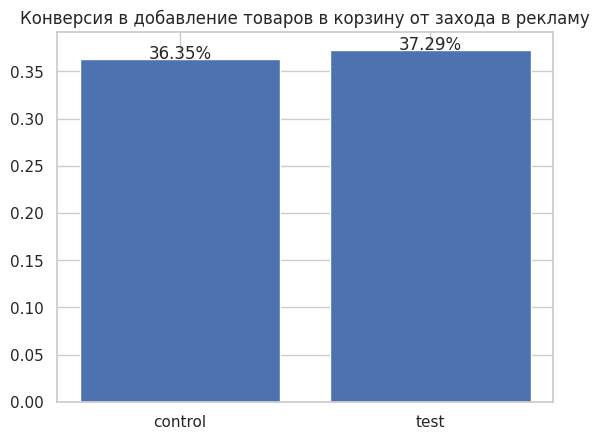

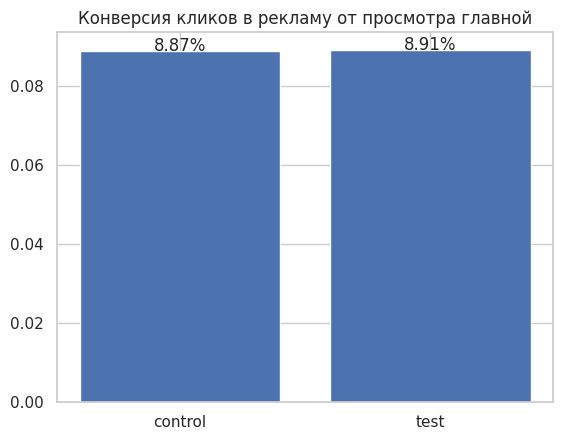

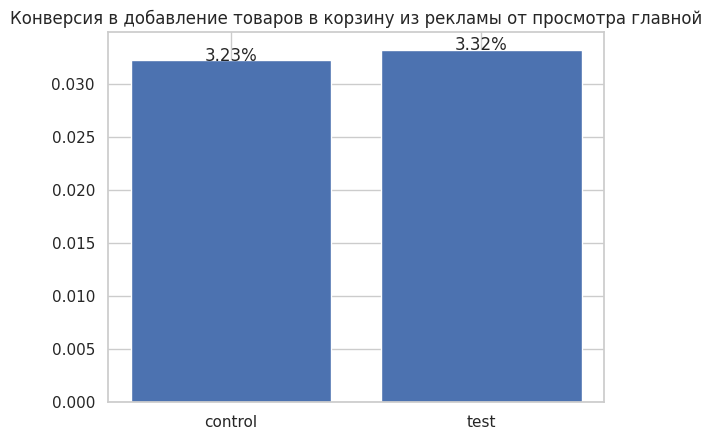

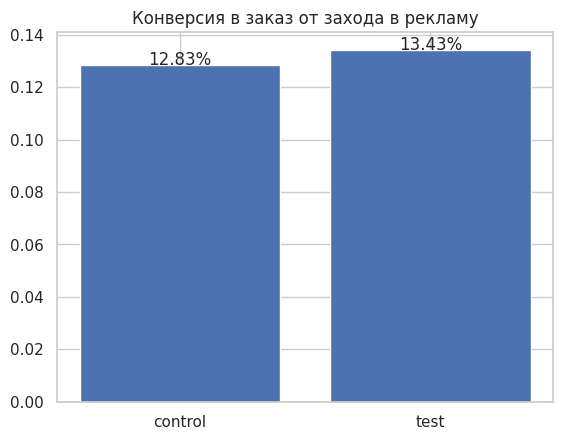

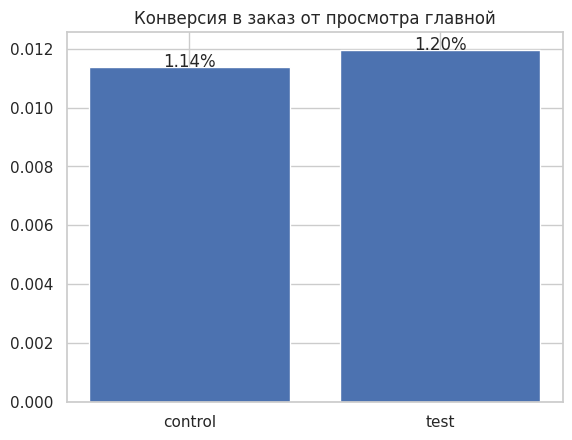

In [90]:
# Группировка по группам эксперимента
grouped = df.groupby('ab_group')

# Конверсия в добавление товаров в корзину от захода в рекламу
conversion_adds_from_ads_click = grouped['cnt_adds_ads'].sum() / grouped['cnt_view_ads'].sum()

# Конверсия кликов в рекламу от просмотра главной
conversion_clicks_from_main_view = grouped['cnt_view_ads'].sum() / grouped.size()

# Конверсия в добавление товаров в корзину из рекламы от просмотра главной
conversion_adds_from_main_view = grouped['cnt_adds_ads'].sum() / grouped.size()

# Конверсия в заказ от захода в рекламу
conversion_orders_from_ads_click = grouped['cnt_orders_ads'].sum() / grouped['cnt_view_ads'].sum()

# Конверсия в заказ от просмотра главной
conversion_orders_from_main_view = grouped['cnt_orders_ads'].sum() / grouped.size()

# Собираем все метрики в один DataFrame для удобства
metrics = pd.DataFrame({
    'Конверсия в добавление товаров в корзину от захода в рекламу': conversion_adds_from_ads_click,
    'Конверсия кликов в рекламу от просмотра главной': conversion_clicks_from_main_view,
    'Конверсия в добавление товаров в корзину из рекламы от просмотра главной': conversion_adds_from_main_view,
    'Конверсия в заказ от захода в рекламу': conversion_orders_from_ads_click,
    'Конверсия в заказ от просмотра главной': conversion_orders_from_main_view
})

for metric in metrics.columns:
    # Выберем данные для столбчатой диаграммы
    data = metrics[metric]

    # Создадим столбчатую диаграмму
    plt.bar(data.index, data)

    # Подпишем значения в процентах
    for bar in plt.gca().patches:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height() * 100:.2f}%',
            ha='center'  # Горизонтальное выравнивание текста
        )

    # Установим заголовок диаграммы
    plt.title(metric, loc='center')

    # Покажем диаграмму
    plt.show()


✅ВЫВОДЫ

Конверсия в заказ от просмотра главной выросла с 1,14% до 1,20%, что составляет относительное увеличение на 5,3%. Конверсия кликов в рекламу от просмотра главной незначительно выросла с 8,87% до 8,91%, что составляет относительное увеличение на 0,4%.


Конверсия в добавление товара в корзину от просмотра главной выросла с 3,23% до 3,32%, что составляет относительное увеличение на 2,8%. Конверсия в добавление товаров в корзину от захода в рекламу выросла с 36,35% до 37,29%, что составляет относительное увеличение на 2,6%. Конверсия в заказ от захода в рекламу выросла с 12,83% до 13,43%, что составляет относительное увеличение на 4,7%.

#Расчет ARPU, ERPPU

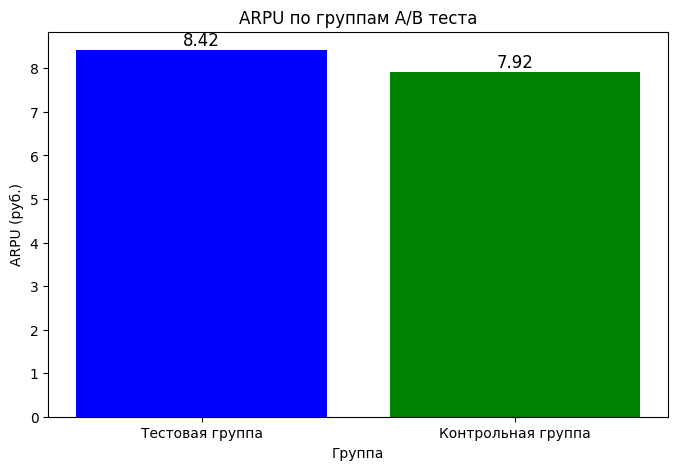

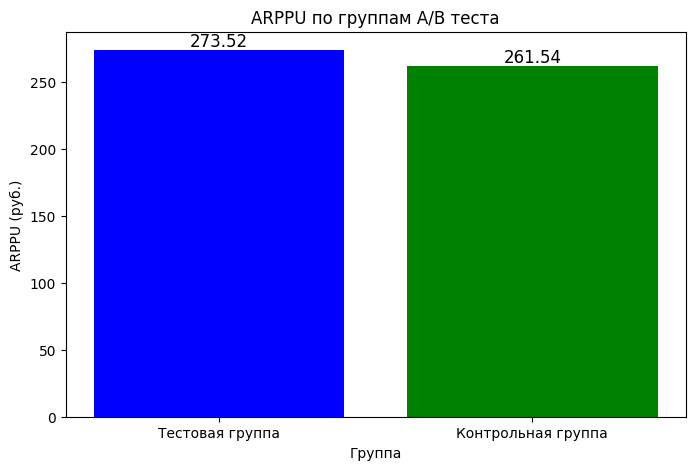

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Рассчитать ARPU и ARPPU для тестовой и контрольной групп
test_group = df[df['ab_group'] == 'test']
test_ARPU = test_group['sum_orders_ads'].sum() / test_group['client_id'].nunique()
test_ARPPU = test_group['sum_orders_ads'].sum() / test_group['is_orders_ads'].sum()

control_group = df[df['ab_group'] == 'control']
control_ARPU = control_group['sum_orders_ads'].sum() / control_group['client_id'].nunique()
control_ARPPU = control_group['sum_orders_ads'].sum() / control_group['is_orders_ads'].sum()

# Построить график ARPU
plt.figure(figsize=(8, 5))
plt.bar(['Тестовая группа', 'Контрольная группа'], [test_ARPU, control_ARPU], color=['blue', 'green'])
plt.xlabel('Группа')
plt.ylabel('ARPU (руб.)')
plt.title('ARPU по группам A/B теста')

# Установить подписи значений над столбцами
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.1,
        f'{bar.get_height():.2f}',
        ha='center',
        color='black',
        fontsize=12
    )

# Построить график ARPPU
plt.figure(figsize=(8, 5))
plt.bar(['Тестовая группа', 'Контрольная группа'], [test_ARPPU, control_ARPPU], color=['blue', 'green'])
plt.xlabel('Группа')
plt.ylabel('ARPPU (руб.)')
plt.title('ARPPU по группам A/B теста')

# Установить подписи значений над столбцами
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 3,
        f'{bar.get_height():.2f}',
        ha='center',
        color='black',
        fontsize=12
    )

plt.show()


✅ВЫВОД

Выручка на пользователя (ARPU) по товарам, добавленным из секции, в тестовой группе 7,92 руб. в контрольной группе 8,42 руб., что составляет относительное увеличение на 6,3%.

Выручка от покупателя (ARPPU) по товарам, добавленным из секции, выросла с 261.54 руб. в тестовой группе до 273,52 руб. в контрольной группе, что составляет относительное увеличение на 4,6%.

## Метрики по результатам A/B теста

In [9]:
df

,Metrics,Control,Test,Effect
0,Размер выборки,491652.0000,489858.0000,NaN
1,Основные метрики,NaN,NaN,NaN
2,Конверсия в заказ от просмотра главной,0.0114,0.0120,0.0526
3,Конверсия кликов в рекламу от просмотра главной,0.0887,0.0891,0.0045
4,"Выручка на покупателя (ARPPU) по товарам, доба...",261.5400,273.5200,0.0458
5,Вспомогательные метрики,NaN,NaN,NaN
6,Конверсия в добавление товара в корзину от про...,0.0323,0.0332,0.0279
7,Конверсия в добавление товаров в корзину от за...,0.3635,0.3729,0.0259
8,Конверсия в заказ от захода в рекламу,0.1283,0.1343,0.0468
9,"Выручка на пользователя (ARPU) по товарам, доб...",7.9200,8.4200,0.0631


#Статистические метрики для определения прокрашенности A/B теста

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Список метрик
metrics = ['conv_rate_order_view', 'conv_rate_click_view', 'ARPPU']

# Цикл по метрикам
for metric in metrics:

    # Объединение данных контрольной и экспериментальной групп
    combined_data = pd.concat([df[df['ab_group'] == 'Control'][metric], df[df['ab_group'] == 'Test'][metric]])

    # Вычисление средних значений
    control_mean = df[df['ab_group'] == 'Control'][metric].mean()
    experiment_mean = df[df['ab_group'] == 'Test'][metric].mean()

    # Вычисление стандартного отклонения
    std_dev = combined_data.std()

    # Вычисление тестовой статистики
    z = (experiment_mean - control_mean) / (std_dev * np.sqrt(1 / df[df['ab_group'] == 'Control'].shape[0] + 1 / df[df['ab_group'] == 'Test'].shape[0]))

    # Вычисление p-value
    p_value = 2 * norm.cdf(-abs(z))

    # Вывод результатов
    print(f"Метрика: {metric}")
    print(f"z-оценка: {z}")
    print(f"p-значение: {p_value}")
    print("\n")


Метрика: conv_rate_order_view
z-оценка: 1.0
p-значение: 0.31731050786291415


Метрика: conv_rate_click_view
z-оценка: 1.0
p-значение: 0.31731050786291415


Метрика: ARPPU
z-оценка: 0.9999999999999999
p-значение: 0.31731050786291415




# ✅ОБЩИЕ ВЫВОДЫ

Конверсия в заказ от просмотра главной p-value = 0,3173 > 0,05, что указывает на то, что изменение не является статистически значимым.

Конверсия кликов в рекламу от просмотра главной p-value = 0,3173 > 0,05, что указывает на то, что изменение не является статистически значимым.

Выручка на покупателя (ARPPU) по товарам, добавленным из секции p-value = 0,3173 > 0,05, что указывает на то, что изменение не является статистически значимым.

Это означает, что они могут быть вызваны случайными колебаниями, а не изменениями в пользовательском интерфейсе.

Такие результаты могут быть обусловлены недостаточной длительностью теста (всего одна неделя).

Несмотря на то, что изменения не являются статистически значимыми, наблюдается общее улучшение во всех трех основных метриках. Это может указывать на то, что изменения имеют потенциал для положительного воздействия при большем количестве данных, большей длительности проведения теста.

#Рекомендации менеджерам
Продолжить отслеживать основные метрики, чтобы оценить, сохранятся ли улучшения с течением времени. Рассмотреть возможность проведения дополнительных А/В-тестов с более крупными выборками или с изменениями в другом направлении, чтобы подтвердить или опровергнуть наблюдаемые тенденции.